In [76]:
import warnings
warnings.filterwarnings('ignore')

In [77]:
import numpy as np
import pandas as pd
import datetime as dt

from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

## Data Loading / Preprocessing - For the mock up, the model will use a subset of the dataset choosen

In [78]:
# Load the data

file_path = '../Resources/weatherAUS.csv'
raw_df = pd.read_csv(file_path)
raw_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [79]:
# Check Datatypes

raw_df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [80]:
raw_df.isna().count()

Date             145460
Location         145460
MinTemp          145460
MaxTemp          145460
Rainfall         145460
Evaporation      145460
Sunshine         145460
WindGustDir      145460
WindGustSpeed    145460
WindDir9am       145460
WindDir3pm       145460
WindSpeed9am     145460
WindSpeed3pm     145460
Humidity9am      145460
Humidity3pm      145460
Pressure9am      145460
Pressure3pm      145460
Cloud9am         145460
Cloud3pm         145460
Temp9am          145460
Temp3pm          145460
RainToday        145460
RainTomorrow     145460
dtype: int64

In [81]:
raw_df['Location'].nunique()

49

## Handle Date column:
Evaluate if date is needed. If so, two options:
- Split "Date" column to year, month and day to prepare for use in regression model
- Pandas datetime column to ordinal (toordinal)

In [82]:
# Date column handling

df = raw_df.copy()

df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [83]:
df1 = df[(df["Year"] >= 2011) & (df["Year"] <= 2016)]
df = df1
df = df.reset_index(drop=True)
print(df.shape)
df.head()

(100935, 26)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2011-01-01,Albury,23.2,35.8,0.0,NaN,NaN,ENE,26.0,S,...,1009.2,NaN,NaN,26.8,32.8,No,No,2011,1,1
1,2011-01-02,Albury,20.1,31.1,0.6,NaN,NaN,W,35.0,SW,...,1009.5,NaN,NaN,25.1,30.2,No,No,2011,1,2
2,2011-01-03,Albury,13.6,29.4,0.0,NaN,NaN,WNW,35.0,SSE,...,1009.3,NaN,NaN,20.2,28.4,No,No,2011,1,3
3,2011-01-04,Albury,13.9,29.2,0.0,NaN,NaN,SSE,24.0,SE,...,1007.8,NaN,NaN,19.9,27.9,No,No,2011,1,4
4,2011-01-05,Albury,16.0,28.9,0.0,NaN,NaN,SSE,31.0,ENE,...,1004.3,NaN,NaN,22.0,26.8,No,No,2011,1,5


## Check if Bucketing Required

In [84]:
# Check the unique value counts to see if binning is required
df.Year.value_counts()

2016    17934
2014    17885
2015    17885
2013    16415
2012    15409
2011    15407
Name: Year, dtype: int64

In [85]:
# Check the unique value counts to see if binning is required
#df.Location.value_counts()

## Update "RainTomorrow" and "RainToday" Columns to Binary Values

In [86]:
df['RainTomorrow'].value_counts()

No     76426
Yes    21980
Name: RainTomorrow, dtype: int64

In [87]:
df['RainToday'].value_counts()

No     76427
Yes    21979
Name: RainToday, dtype: int64

In [88]:
df['RainTomorrow'] = df.RainTomorrow.eq('Yes').mul(1)
df['RainTomorrow'].value_counts()

0    78955
1    21980
Name: RainTomorrow, dtype: int64

In [89]:
df['RainToday'] = df.RainToday.eq('Yes').mul(1)
df['RainToday'].value_counts()

0    78956
1    21979
Name: RainToday, dtype: int64

In [90]:
df.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                 int32
RainTomorrow              int32
Year                      int64
Month                     int64
Day                       int64
dtype: object

## Feature Selection: Drop Unnecessary Columns / Handle Missing Data

In [91]:
# Drop the null columns where all values are null
#df = df.dropna(axis='columns', how='all')

# Drop the null rows
#df = df.dropna()

columns = ['Date', 'Location', 'WindGustDir', 'WindDir3pm', 'WindDir9am']
df = df.drop(columns, axis=1)

num_cols = df.select_dtypes('float64').columns.to_list()
num_cols

for col in num_cols:
    df[col].fillna(df[col].mean(),inplace=True)            

df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,23.2,35.8,0.0,5.551915,7.608659,26.0,13.0,9.0,46.0,29.0,...,1009.2,4.462449,4.519427,26.8,32.8,0,0,2011,1,1
1,20.1,31.1,0.6,5.551915,7.608659,35.0,2.0,15.0,45.0,27.0,...,1009.5,4.462449,4.519427,25.1,30.2,0,0,2011,1,2
2,13.6,29.4,0.0,5.551915,7.608659,35.0,19.0,11.0,56.0,28.0,...,1009.3,4.462449,4.519427,20.2,28.4,0,0,2011,1,3
3,13.9,29.2,0.0,5.551915,7.608659,24.0,11.0,11.0,53.0,38.0,...,1007.8,4.462449,4.519427,19.9,27.9,0,0,2011,1,4
4,16.0,28.9,0.0,5.551915,7.608659,31.0,4.0,9.0,57.0,31.0,...,1004.3,4.462449,4.519427,22.0,26.8,0,0,2011,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100930,22.1,35.8,63.8,5.551915,7.608659,43.0,17.0,31.0,77.0,41.0,...,995.2,4.000000,2.000000,26.0,33.5,1,0,2016,12,27
100931,22.6,36.8,0.0,5.551915,7.608659,50.0,30.0,15.0,63.0,39.0,...,998.8,4.462449,4.519427,29.7,34.0,0,0,2016,12,28
100932,23.2,38.0,0.0,5.551915,7.608659,33.0,17.0,17.0,25.0,14.0,...,1001.0,4.462449,4.519427,28.7,36.4,0,0,2016,12,29
100933,19.7,37.0,0.0,5.551915,7.608659,37.0,22.0,6.0,30.0,23.0,...,1000.9,4.462449,4.519427,28.2,35.1,0,0,2016,12,30


In [92]:
print(df.shape)
#print(num_cols)
df.head()

(100935, 21)


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,23.2,35.8,0.0,5.551915,7.608659,26.0,13.0,9.0,46.0,29.0,...,1009.2,4.462449,4.519427,26.8,32.8,0,0,2011,1,1
1,20.1,31.1,0.6,5.551915,7.608659,35.0,2.0,15.0,45.0,27.0,...,1009.5,4.462449,4.519427,25.1,30.2,0,0,2011,1,2
2,13.6,29.4,0.0,5.551915,7.608659,35.0,19.0,11.0,56.0,28.0,...,1009.3,4.462449,4.519427,20.2,28.4,0,0,2011,1,3
3,13.9,29.2,0.0,5.551915,7.608659,24.0,11.0,11.0,53.0,38.0,...,1007.8,4.462449,4.519427,19.9,27.9,0,0,2011,1,4
4,16.0,28.9,0.0,5.551915,7.608659,31.0,4.0,9.0,57.0,31.0,...,1004.3,4.462449,4.519427,22.0,26.8,0,0,2011,1,5


## Encode Columns - Use OneHotEncoder

In [93]:
# Generate our categorical variable list
df_cat = df.dtypes[df.dtypes == "object"].index.tolist()
df_cat

[]

In [94]:
print(df[df_cat].nunique())
print(df.shape)
df.head()

Series([], dtype: float64)
(100935, 21)


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,23.2,35.8,0.0,5.551915,7.608659,26.0,13.0,9.0,46.0,29.0,...,1009.2,4.462449,4.519427,26.8,32.8,0,0,2011,1,1
1,20.1,31.1,0.6,5.551915,7.608659,35.0,2.0,15.0,45.0,27.0,...,1009.5,4.462449,4.519427,25.1,30.2,0,0,2011,1,2
2,13.6,29.4,0.0,5.551915,7.608659,35.0,19.0,11.0,56.0,28.0,...,1009.3,4.462449,4.519427,20.2,28.4,0,0,2011,1,3
3,13.9,29.2,0.0,5.551915,7.608659,24.0,11.0,11.0,53.0,38.0,...,1007.8,4.462449,4.519427,19.9,27.9,0,0,2011,1,4
4,16.0,28.9,0.0,5.551915,7.608659,31.0,4.0,9.0,57.0,31.0,...,1004.3,4.462449,4.519427,22.0,26.8,0,0,2011,1,5


In [95]:
# Create the OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(df[df_cat]))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(df_cat)
encode_df.head()
print(encode_df.shape)

(100935, 0)


In [96]:
print(encode_df.shape)
encode_df.head()

(100935, 0)


""
0
1
2
3
4


In [97]:
print(df.shape)
df.head()

(100935, 21)


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,23.2,35.8,0.0,5.551915,7.608659,26.0,13.0,9.0,46.0,29.0,...,1009.2,4.462449,4.519427,26.8,32.8,0,0,2011,1,1
1,20.1,31.1,0.6,5.551915,7.608659,35.0,2.0,15.0,45.0,27.0,...,1009.5,4.462449,4.519427,25.1,30.2,0,0,2011,1,2
2,13.6,29.4,0.0,5.551915,7.608659,35.0,19.0,11.0,56.0,28.0,...,1009.3,4.462449,4.519427,20.2,28.4,0,0,2011,1,3
3,13.9,29.2,0.0,5.551915,7.608659,24.0,11.0,11.0,53.0,38.0,...,1007.8,4.462449,4.519427,19.9,27.9,0,0,2011,1,4
4,16.0,28.9,0.0,5.551915,7.608659,31.0,4.0,9.0,57.0,31.0,...,1004.3,4.462449,4.519427,22.0,26.8,0,0,2011,1,5


In [98]:
# Merge one-hot encoded features and drop the originals
df = df.merge(encode_df,left_index=True, right_index=True)
df = df.drop(df_cat, axis=1)
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,23.2,35.8,0.0,5.551915,7.608659,26.0,13.0,9.0,46.0,29.0,...,1009.2,4.462449,4.519427,26.8,32.8,0,0,2011,1,1
1,20.1,31.1,0.6,5.551915,7.608659,35.0,2.0,15.0,45.0,27.0,...,1009.5,4.462449,4.519427,25.1,30.2,0,0,2011,1,2
2,13.6,29.4,0.0,5.551915,7.608659,35.0,19.0,11.0,56.0,28.0,...,1009.3,4.462449,4.519427,20.2,28.4,0,0,2011,1,3
3,13.9,29.2,0.0,5.551915,7.608659,24.0,11.0,11.0,53.0,38.0,...,1007.8,4.462449,4.519427,19.9,27.9,0,0,2011,1,4
4,16.0,28.9,0.0,5.551915,7.608659,31.0,4.0,9.0,57.0,31.0,...,1004.3,4.462449,4.519427,22.0,26.8,0,0,2011,1,5


In [99]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'Year', 'Month',
       'Day'],
      dtype='object')

In [100]:
print(df.shape)
df.head()

(100935, 21)


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,23.2,35.8,0.0,5.551915,7.608659,26.0,13.0,9.0,46.0,29.0,...,1009.2,4.462449,4.519427,26.8,32.8,0,0,2011,1,1
1,20.1,31.1,0.6,5.551915,7.608659,35.0,2.0,15.0,45.0,27.0,...,1009.5,4.462449,4.519427,25.1,30.2,0,0,2011,1,2
2,13.6,29.4,0.0,5.551915,7.608659,35.0,19.0,11.0,56.0,28.0,...,1009.3,4.462449,4.519427,20.2,28.4,0,0,2011,1,3
3,13.9,29.2,0.0,5.551915,7.608659,24.0,11.0,11.0,53.0,38.0,...,1007.8,4.462449,4.519427,19.9,27.9,0,0,2011,1,4
4,16.0,28.9,0.0,5.551915,7.608659,31.0,4.0,9.0,57.0,31.0,...,1004.3,4.462449,4.519427,22.0,26.8,0,0,2011,1,5


## Variable Declaration and Split into Test/Train

In [101]:
# define Target Variable
X = df.copy()
X = X.drop("RainTomorrow", axis=1)
y = df["RainTomorrow"]

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, train_size = 0.8)

In [102]:
print(len(X_train))
print(len(X_test))

80748
20187


## Scale the Data
- StandardScaler
- MinMaxScaler

#### Using StandardScaler for the mock up

In [103]:
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## May Need to Handle Class Imbalance - TBD

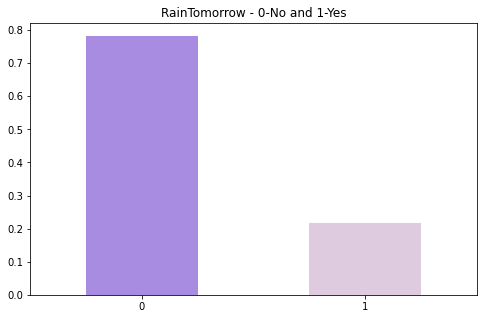

In [104]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,5))
df.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['mediumpurple','thistle'], alpha = 0.8, rot=0)
plt.title('RainTomorrow - 0-No and 1-Yes')
plt.show()

In [105]:
# Resample the training data with the RandomOversampler
from collections import Counter

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train_scaled, y_train)


Counter(y_resampled)

Counter({1: 63164, 0: 63164})

## Define Machine Learning Model
### We want to evaluate the following three models to find the best fit:
- Random forest
- GBM (Boosting)
- Logistic
####  Balanced Random Forest mockup below

In [106]:
# Create a random forest classifier.

#from sklearn.ensemble import RandomForestClassifier
#rf_model = RandomForestClassifier(n_estimators=128, random_state=42) 

from imblearn.ensemble import BalancedRandomForestClassifier
rf_model = BalancedRandomForestClassifier(n_estimators=100, random_state=42) 

# Fitting the model
rf_model = rf_model.fit(X_resampled, y_resampled)

# Making predictions using the testing data.
y_pred = rf_model.predict(X_test_scaled)



## Model Validation
- Accuracy Report
- Confusion Matrix
- Classification Report



In [107]:
# Calculating the confusion matrix.
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,14666,1125
Actual 1,1867,2529


In [108]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))
print('Accuracy Score : ',balanced_accuracy_score(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.89      0.93      0.58      0.91      0.73      0.55     15791
          1       0.69      0.58      0.93      0.63      0.73      0.52      4396

avg / total       0.84      0.85      0.65      0.85      0.73      0.54     20187

Accuracy Score :  0.752026305109584


In [109]:
# List the features sorted in descending order by feature importance
importances = rf_model.feature_importances_
for importance, feat in sorted(zip(rf_model.feature_importances_, X.columns), reverse=True):
    print(f'{feat}: ({importance})')

Humidity3pm: (0.1658601868288033)
Pressure3pm: (0.06796335276489199)
Pressure9am: (0.061704190398999575)
Sunshine: (0.061019097597777586)
Rainfall: (0.060130640877325205)
WindGustSpeed: (0.05749291487652593)
Humidity9am: (0.05682198273613888)
Temp3pm: (0.04830510739740107)
MinTemp: (0.04762341051473204)
MaxTemp: (0.04737051732041557)
Temp9am: (0.044618684588026404)
Cloud3pm: (0.04173973058301212)
Day: (0.03769000367954659)
WindSpeed3pm: (0.03364743959781162)
RainToday: (0.03250470745045338)
WindSpeed9am: (0.031819214947908375)
Month: (0.02837175724092985)
Cloud9am: (0.027913894730666782)
Evaporation: (0.02641746764832089)
Year: (0.020985698220312703)


## Gradient Boosting

In [75]:
from sklearn.ensemble import GradientBoostingClassifier
classifier_gb = GradientBoostingClassifier()
classifier_gb.fit(X_resampled, y_resampled)
y_gb=classifier_gb.predict(X_test_scaled)
print(classification_report_imbalanced(y_test, y_gb))
print('Accuracy Score : ',balanced_accuracy_score(y_test, y_gb))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.92      0.80      0.77      0.86      0.78      0.61     15791
          1       0.51      0.77      0.80      0.61      0.78      0.61      4396

avg / total       0.83      0.79      0.77      0.80      0.78      0.61     20187

Accuracy Score :  0.7818586438676411


In [36]:
from sklearn.linear_model import LinearRegression

X = df.copy()
X = X.drop("Rainfall", axis=1)
y = df["Rainfall"]


# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [37]:
y_pred = lr.predict(X_test)

In [38]:
y_pred

array([-1.23023224, 10.3738327 ,  1.7009201 , ..., -1.23020172,
        8.75737762,  9.25361633])

In [40]:
# Print the imbalanced classification report
#print(classification_report_imbalanced(y_test, y_pred))